In [24]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split
import time

np.random.seed(1)

In [25]:
start = time.time()

In [19]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []

shape = (200,200) 

train_path = 'train'

for filename in os.listdir('train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [6]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
shape = (200,200)
test_path = 'test'

for filename in os.listdir('test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

[1 0 0 0]


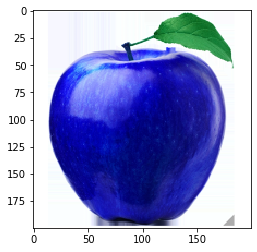

In [7]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

[0 1 0 0]


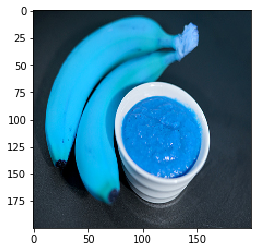

In [23]:
# Visualizing Training data
print(train_labels[80])
plt.imshow(train_images[80])

In [9]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [10]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten_1 (Flatten)          (None, 63480)            

In [11]:
# Training the model
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Train on 180 samples, validate on 60 samples
Epoch 1/50
180/180 [==============================] - 19s 105ms/step - loss: 2.5487 - acc: 0.3833 - val_loss: 35.7736 - val_acc: 0.0500
Epoch 2/50
180/180 [==============================] - 20s 112ms/step - loss: 11.5242 - acc: 0.3389 - val_loss: 1.4706 - val_acc: 0.4333
Epoch 3/50
180/180 [==============================] - 20s 109ms/step - loss: 1.2583 - acc: 0.4722 - val_loss: 1.3692 - val_acc: 0.4000
Epoch 4/50
180/180 [==============================] - 19s 103ms/step - loss: 1.2092 - acc: 0.3722 - val_loss: 1.3884 - val_acc: 0.2833
Epoch 5/50
180/180 [==============================] - 18s 100ms/step - loss: 1.2521 - acc: 0.2944 - val_loss: 1.3471 - val_acc: 0.2833
Epoch 6/50
180/180 [==============================] - 18s 100ms/step - loss: 1.1839 - acc: 0.2944 - val_loss: 1.3364 - val_acc: 0.3000
Epoch 7/50
180/180 [==============================] - 16s 88ms/step - loss: 1.1384 - acc: 0.2889 - val_loss: 1.2633 - val_acc: 0.4000
Epoch 8/5

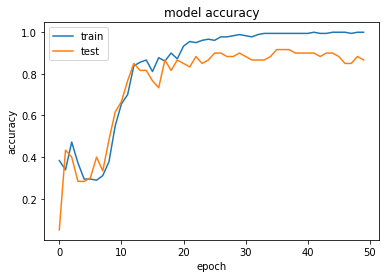

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

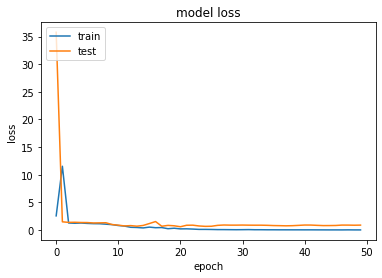

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

60/60 [==============================] - 1s 24ms/step
[0.872941772143046, 0.8666666746139526]


Actual :-  ['apple']
Predicted :-  apple


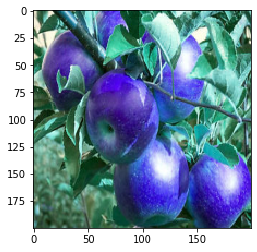

In [15]:
# Testing predictions and the actual label
checkImage = test_images[0:1]
checklabel = test_labels[0:1]
plt.imshow(test_images[0])

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

In [16]:
target_dir = './models/'

if not os.path.exists(target_dir):
    os.mkdir(target_dir)

model.save('./models/model.h5')
model.save_weights('./models/weights.h5')

In [17]:
end = time.time()
dur = end-start

if dur<60:
    print("Execution Time:",dur,"seconds")
elif dur>60 and dur<3600:
    dur=dur/60
    print("Execution Time:",dur,"minutes")
else:
    dur=dur/(60*60)
    print("Execution Time:",dur,"hours")

Execution Time: 20.23547988732656 minutes
